# Imports


In [394]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support)
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap


# Iris dataset

In [395]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Scaling

In [396]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

# Define K-Fold cross-validation

In [397]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


# List of k values

In [398]:
ks = list(range(1, 21))
mean_acc_scores = []

# Loop over k values

In [399]:
for k in ks:
    acc_scores = []
    for train_idx, val_idx in kfold.split(X_train_scaled):
        X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        knn = neighbors.KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_tr, y_tr)
        acc = knn.score(X_val, y_val)
        acc_scores.append(acc)
    
    mean_acc_scores.append(np.mean(acc_scores))


# Print results


In [400]:
for i in range(len(ks)):
    k = ks[i]
    score = mean_acc_scores[i]
    print(f"k = {k}, Mean CV Accuracy = {score:.4f}")


k = 1, Mean CV Accuracy = 0.9417
k = 2, Mean CV Accuracy = 0.9167
k = 3, Mean CV Accuracy = 0.9333
k = 4, Mean CV Accuracy = 0.9250
k = 5, Mean CV Accuracy = 0.9417
k = 6, Mean CV Accuracy = 0.9417
k = 7, Mean CV Accuracy = 0.9500
k = 8, Mean CV Accuracy = 0.9500
k = 9, Mean CV Accuracy = 0.9417
k = 10, Mean CV Accuracy = 0.9417
k = 11, Mean CV Accuracy = 0.9250
k = 12, Mean CV Accuracy = 0.9250
k = 13, Mean CV Accuracy = 0.9333
k = 14, Mean CV Accuracy = 0.9333
k = 15, Mean CV Accuracy = 0.9417
k = 16, Mean CV Accuracy = 0.9333
k = 17, Mean CV Accuracy = 0.9333
k = 18, Mean CV Accuracy = 0.9250
k = 19, Mean CV Accuracy = 0.9417
k = 20, Mean CV Accuracy = 0.9250


# The best k is 7

In [401]:
best_k = 7

# Plot results


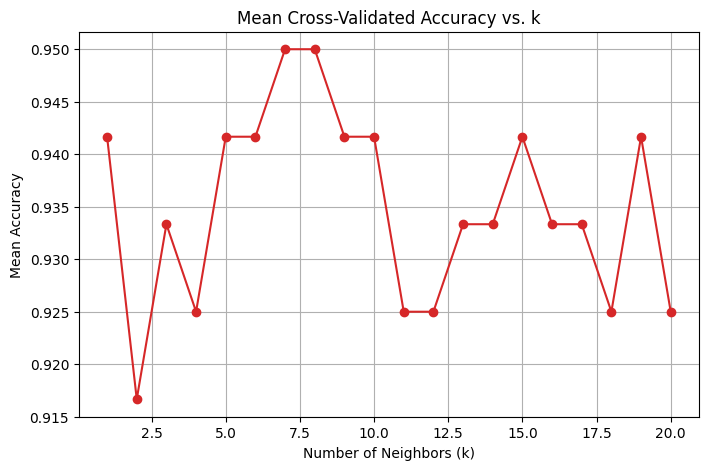

In [402]:
plt.figure(figsize=(8,5))
plt.plot(ks, mean_acc_scores, color='tab:red', marker="o")
plt.title('Mean Cross-Validated Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.grid(True)


# Evaluate on the test set using the best k


In [403]:
knn_best = neighbors.KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred = knn_best.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_pred)
print(f"\nBest k = {best_k}, Test Set Accuracy = {test_acc:.4f}")


Best k = 7, Test Set Accuracy = 1.0000


# Confusion Matrix 


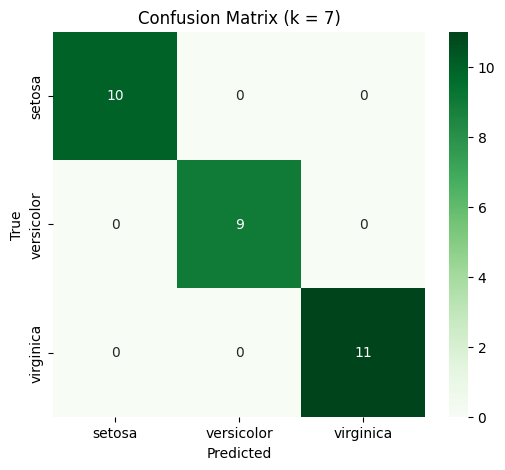

In [404]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix (k = {best_k})")
plt.show()


# PCA to reduce to 2D

In [405]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(X_scaled)

# Train KNN on scaled data


In [406]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# Plotting with lines

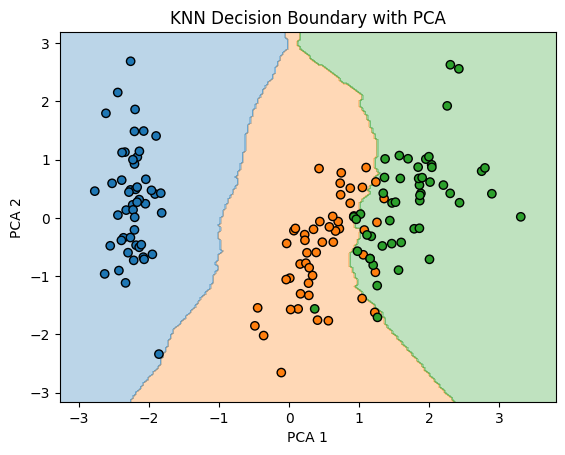

In [409]:
# Create meshgrid 
feature1, feature2 = np.meshgrid(
    np.linspace(X2[:, 0].min() - 0.5, X2[:, 0].max() + 0.5, 200),
    np.linspace(X2[:, 1].min() - 0.5, X2[:, 1].max() + 0.5, 200)
)

grid = np.vstack([feature1.ravel(), feature2.ravel()]).T
inv = pca.inverse_transform(grid)

#predict on the grid
y_pred_grid = np.reshape(knn.predict(inv), feature1.shape)

#colormap for 3 classes
base_cmap = plt.cm.tab10
region_colors = ListedColormap(base_cmap.colors[:3])
point_colors = ListedColormap(base_cmap.colors[:3])

# decision regions
display = DecisionBoundaryDisplay(xx0=feature1, xx1=feature2, response=y_pred_grid)
display.plot(cmap=region_colors, alpha=0.3)

# PCA-reduced points
scatter = display.ax_.scatter(X2[:, 0], X2[:, 1], c=y, cmap=point_colors, edgecolor="black",
)

#plot
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KNN Decision Boundary with PCA")
plt.show()
